In [63]:
!apt-get update -qq
!apt-get install -y fonts-nanum* > /dev/null

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


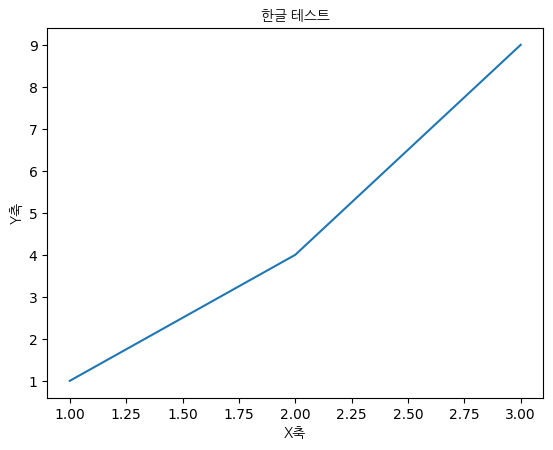

In [64]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Colab에 설치된 나눔고딕 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 테스트 그래프
plt.plot([1,2,3], [1,4,9])
plt.title("한글 테스트", fontproperties=font_prop)
plt.xlabel("X축", fontproperties=font_prop)
plt.ylabel("Y축", fontproperties=font_prop)
plt.show()

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
import seaborn as snsn

df = pd.read_csv("/content/search_trend_최종.csv",encoding='utf-8')


분석할 날짜 컬럼 수: 158
=== 업종별 트렌드 분석 결과 ===
    업종_대        업종_소     기울기      R² 트렌드_방향
0   서비스업       기타 학원 -0.1254  0.3222  강한 하락
1   서비스업     독서실/고시원 -0.2845  0.6902  강한 하락
2   서비스업       미용서비스 -0.1338  0.3460  강한 하락
3   서비스업         부동산 -0.2242  0.6595  강한 하락
4   서비스업    세탁/가사서비스  0.0332  0.0372  약한 상승
5   서비스업       수리서비스 -0.0276  0.0259  약한 하락
6   서비스업          숙박 -0.0642  0.0941  약한 하락
7   서비스업      예체능계학원 -0.2028  0.4559  강한 하락
8   서비스업       외국어학원 -0.0945  0.1304  약한 하락
9   서비스업         의료업 -0.1626  0.5914  강한 하락
10  서비스업       일반스포츠 -0.0032  0.0004  약한 하락
11  서비스업        입시학원  0.0184  0.0066  약한 상승
12  서비스업    차량관리/서비스  0.0220  0.0188  약한 상승
13  서비스업       취미/오락 -0.0457  0.0218  약한 하락
14   소매업        가전제품 -0.0730  0.1203  약한 하락
15   소매업     건강/기호식품 -0.0825  0.1172  약한 하락
16   소매업     사무/교육용품 -0.0725  0.1157  약한 하락
17   소매업       서적/도서 -0.0347  0.0274  약한 하락
18   소매업       선물/완구 -0.0711  0.1373  약한 하락
19   소매업    스포츠/레져용품 -0.0032  0.0004  약한 하락
20   소매업     음/식료품소매 -0.0940  0.2028 

/tmp/ipython-input-4091788352.py:121: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4091788352.py:121: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4091788352.py:121: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4091788352.py:121: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4091788352.py:121: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4091788352.py:121: UserWarning: Glyph 47116 (\N{HANGUL SYLLABLE REN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4091788352.py:121: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layo

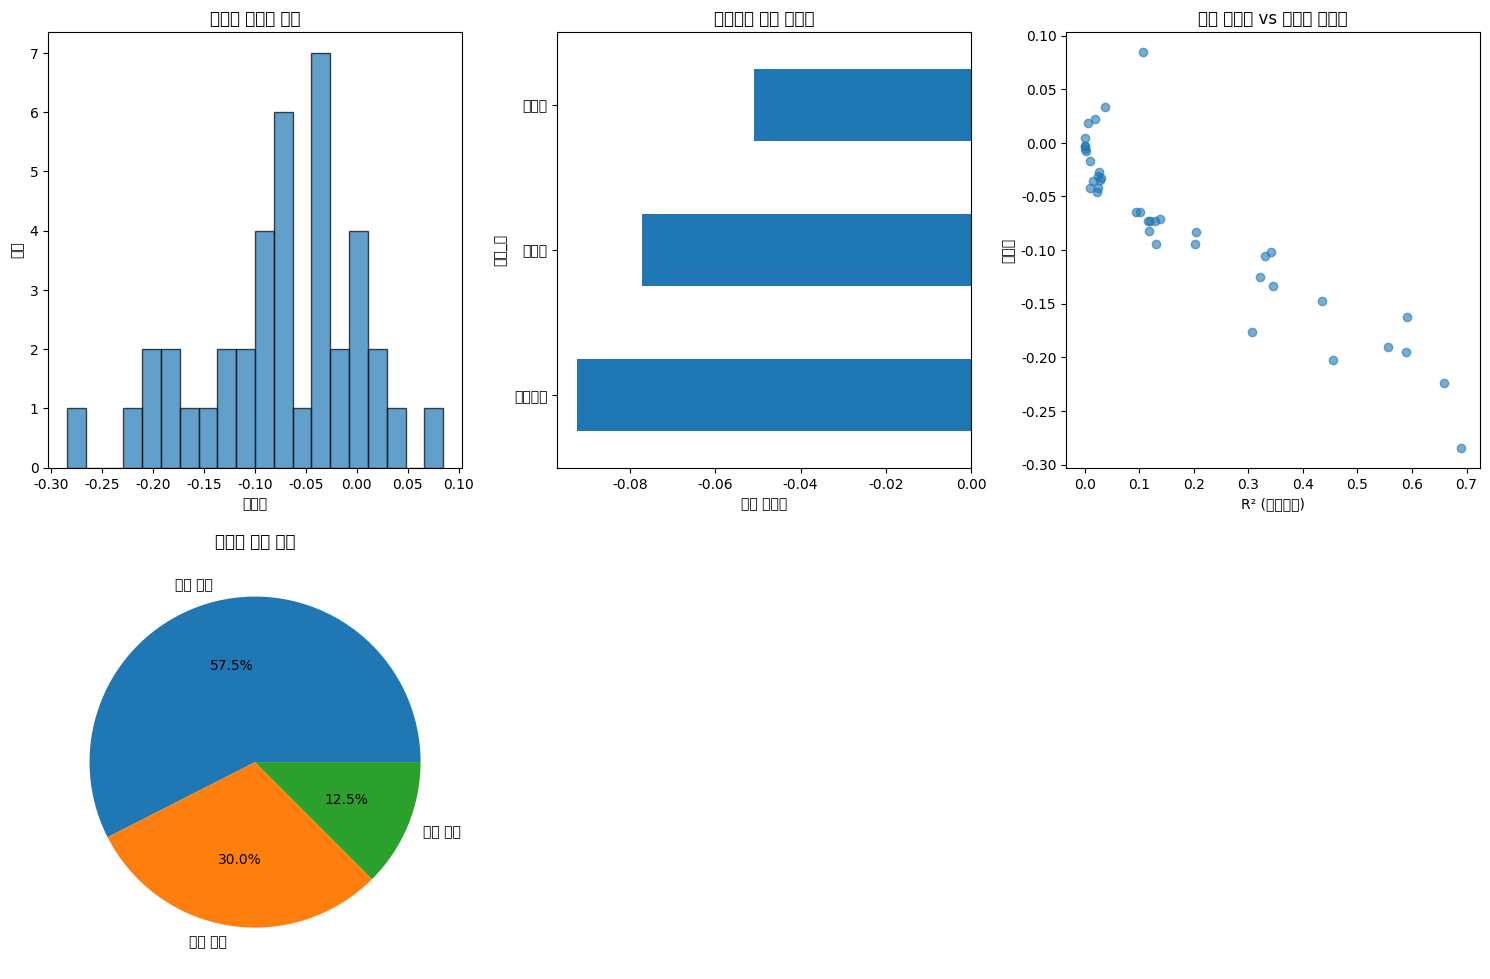


=== 상승 트렌드 TOP 5 ===
    업종_대      업종_소       기울기        R²
36   음식업        중식  0.084748  0.105950
4   서비스업  세탁/가사서비스  0.033186  0.037244
12  서비스업  차량관리/서비스  0.022003  0.018850
11  서비스업      입시학원  0.018370  0.006551
39   음식업        한식  0.004608  0.000437

=== 하락 트렌드 TOP 5 ===
    업종_대       업종_소       기울기        R²
1   서비스업    독서실/고시원 -0.284523  0.690237
3   서비스업        부동산 -0.224185  0.659513
7   서비스업     예체능계학원 -0.202781  0.455911
25   소매업      종합소매점 -0.195043  0.588586
23   소매업  인테리어/가정용품 -0.190074  0.555254


In [67]:


# 날짜 컬럼들 추출 (2021-12-26부터 2024-12-29까지)
date_columns = [col for col in df.columns if '-' in col and col not in ['업종_대', '업종_소']]
print(f"분석할 날짜 컬럼 수: {len(date_columns)}")

# 시간 인덱스 생성 (0부터 시작하는 연속된 숫자)
time_points = np.arange(len(date_columns)).reshape(-1, 1)

def calculate_trend_slope(values):
    """선형회귀로 기울기 계산"""
    # NaN 값 처리
    valid_mask = ~np.isnan(values)
    if np.sum(valid_mask) < 2:  # 최소 2개 데이터 포인트 필요
        return np.nan, np.nan, np.nan

    valid_time = time_points[valid_mask]
    valid_values = values[valid_mask].reshape(-1, 1)

    # 선형회귀 모델
    model = LinearRegression()
    model.fit(valid_time, valid_values)

    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    r_squared = model.score(valid_time, valid_values)

    return slope, intercept, r_squared

# 업종별 트렌드 분석
trend_results = []

for idx, row in df.iterrows():
    업종_대 = row['업종_대']
    업종_소 = row['업종_소']

    # 시계열 데이터 추출
    time_series_data = row[date_columns].values.astype(float)

    # 트렌드 계산
    slope, intercept, r_squared = calculate_trend_slope(time_series_data)

    # 추가 통계 정보
    # (제거됨)

    # 트렌드 방향 분류
    if pd.isna(slope):
        trend_direction = "데이터 부족"
    elif slope > 0.1:
        trend_direction = "강한 상승"
    elif slope > 0:
        trend_direction = "약한 상승"
    elif slope < -0.1:
        trend_direction = "강한 하락"
    elif slope < 0:
        trend_direction = "약한 하락"
    else:
        trend_direction = "평행"

    trend_results.append({
        '업종_대': 업종_대,
        '업종_소': 업종_소,
        '기울기': slope,
        'R²': r_squared,
        '트렌드_방향': trend_direction
    })

# 결과를 DataFrame으로 변환
trend_df = pd.DataFrame(trend_results)

# 결과 출력
print("=== 업종별 트렌드 분석 결과 ===")
print(trend_df.round(4))

# 대업종별 요약 통계
print("\n=== 대업종별 평균 기울기 ===")
major_industry_summary = trend_df.groupby('업종_대').agg({
    '기울기': ['mean', 'count'],
    'R²': 'mean'
}).round(4)
print(major_industry_summary)

# 트렌드 방향별 분포
print("\n=== 트렌드 방향별 업종 분포 ===")
trend_distribution = trend_df['트렌드_방향'].value_counts()
print(trend_distribution)

# 결과 저장
trend_df.to_csv('업종별_트렌드_분석결과.csv', index=False, encoding='utf-8')
print("\n결과가 '업종별_트렌드_분석결과.csv'로 저장되었습니다.")


# 시각화
plt.figure(figsize=(15, 10))

# 1. 기울기 분포 히스토그램
plt.subplot(2, 3, 1)
plt.hist(trend_df['기울기'].dropna(), bins=20, alpha=0.7, edgecolor='black')
plt.title("트렌드 기울기 분포")
plt.xlabel("기울기")
plt.ylabel("빈도")

# 2. 대업종별 평균 기울기
plt.subplot(2, 3, 2)
major_slopes = trend_df.groupby('업종_대')['기울기'].mean().sort_values()
major_slopes.plot(kind='barh')
plt.title('대업종별 평균 기울기')
plt.xlabel('평균 기울기')

# 3. R² vs 기울기 산점도
plt.subplot(2, 3, 3)
plt.scatter(trend_df['R²'], trend_df['기울기'], alpha=0.6)
plt.xlabel('R² (결정계수)')
plt.ylabel('기울기')
plt.title('모델 적합도 vs 트렌드 기울기')

# 4. 트렌드 방향 파이차트
plt.subplot(2, 3, 4)
trend_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('트렌드 방향 분포')
plt.ylabel('')

plt.tight_layout()
plt.savefig('업종별_트렌드_분석_시각화.png', dpi=300, bbox_inches='tight')
plt.show()

# 상위/하위 트렌드 업종 출력
print("\n=== 상승 트렌드 TOP 5 ===")
top_rising = trend_df.nlargest(5, '기울기')[['업종_대', '업종_소', '기울기', 'R²']]
print(top_rising)

print("\n=== 하락 트렌드 TOP 5 ===")
top_falling = trend_df.nsmallest(5, '기울기')[['업종_대', '업종_소', '기울기', 'R²']]
print(top_falling)